# Final Exam (part 2) - Computational Physics I

### Deadline: Friday 13 December 2024 (by 17h00)
### Credits: 10 points

### Please keep the structure provided below and submit an organised notebook with clear answers to each item.

## Name: Alan Palma Travez

## 2. Monte Carlo simulations: Cosmology (10 points) 

Supernovae type Ia (SN Ia) are very energetic astronomical explosions, which have a very similar intrinsic known brightness (i.e. they have a very similar absolute magnitude $M$), so they can be used as cosmological "standard candles" to measure the luminosity distance, $d$, as a function of redshift, $z$:

\begin{equation}
d=\frac{cz}{H_0}
\end{equation}

where $c$ is the speed of light and $H_0$ is the Hubble constant. Since they have similar absolute magnitudes $M$, we can estimate distances by comparing how bright or faint they appear on the sky as indicated by the measured apparent magnitude, $m$, which does differ:

\begin{equation}
m=M+5\log\left(\frac{d}{\rm Mpc}\right)+25
\end{equation}

Higher $m$ values imply objects are fainter; lower $m$ values imply objects are brighter. Same for $M$. Unfortunately, selection effects associated with instrumental limitations can bias our measurements. For example, far-away SN Ia can be so faint that they may not be detectable, so the sample will be biased towards brighter objects. In the equation above $\rm Mpc$ stands for Mega parsecs, which are distance units used in cosmology.

**Therefore, to understand selection bias, we want to simulate this effect using a Monte Carlo simulation.**

The purpose of this problem is to determine the bias as a function of redshift for a sample of objects (SN Ia) via a Monte Carlo calculation. To set up your simulation, assume that:

- $H_0 = 70\,\rm km\,s^{-1}\,Mpc^{-1}$

- the absolute magnitude of SN Ia $M=-19.5\,\rm mag$.

- your supernova search will be able to detect $100$% of objects as faint as $m=18.5\,\rm mag$, and none fainter. 

(a) Write a python function to generate $N$ Gaussian random variables with mean $\langle M\rangle=-19.5\,\rm mag$ and different standard deviations ($\sigma_M=0.1$, $0.2$, and $0.5\,\rm mag$).

In [1]:
#Third party libraries

import numpy as np
import matplotlib.pyplot as plt
import scienceplots


In [2]:
plt.style.use(['science', 'notebook', 'no-latex']) #define the plot style

In [3]:
def random_variables(N, M_mean, std_arr):
    """
    Function generate N Gaussian random variables with mean M_mean for different values 
    of standard deviations.
    Inputs: 
        N (int): Number of random variables to generate for each standard deviation
        M_mean (float): Mean value to generate the distribution
        std_arr (float): 1D array containing the standard deviation values.
    Output:
        rand_var_dic (float): A dictionary where each key is a standard deviation (float) and the value is 
                              a 1D numpy array of N random variables sampled from the corresponding Gaussian 
                              distribution.
    Author: Alan Palma
    """

    #Empty dictionary to save generated array for each sigma

    rand_var_dic = {}

    #For loop to generate the random variables for each sigma

    for std in std_arr:

        rand_var_dic[std] = np.random.normal(loc = M_mean, scale = std, size = N) #Generate the random variables and store it 
        
    return rand_var_dic


(b) Make $3$ plots of $M$ versus $N$, where $N$ is the number of generated objects, one for each $\sigma_M$.


In [4]:
# Define an array containing each sigma value

std_arr = np.array([0.1, 0.2, 0.5])

# Define the mean brightness

M_mean = -19.5

# Define the number of variables to generate

N = 6000

# Create an array

N_arr = np.arange(0, N)

# print(N_arr[-1])

In [5]:
# Evaluate te function created in a)

variables_arr = random_variables(N, M_mean, std_arr)

# print(variables_arr[std_arr[0]].shape)
# print(N_arr.shape)

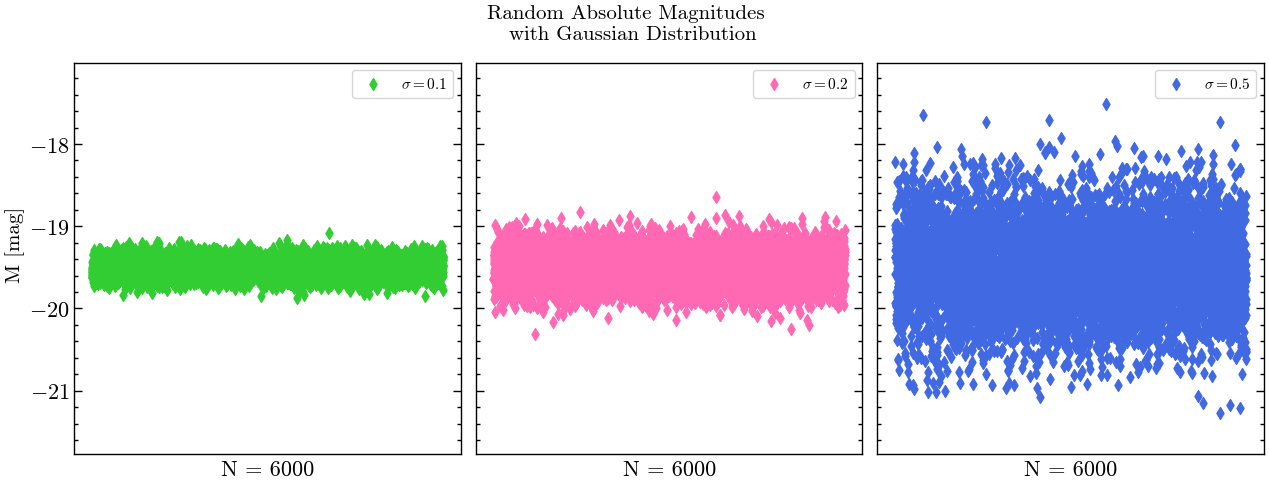

In [6]:
# Figure for visualizing the generated numbers for absolute magnitudes

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (13,5), sharey=True)
ax1, ax2, ax3 = axs.flatten()

fig.suptitle("Random Absolute Magnitudes \n with Gaussian Distribution", fontsize = 15)
fig.supylabel("M [mag]", fontsize = 15)

plt1 = ax1.scatter(N_arr, variables_arr[std_arr[0]], marker = "d", color = "limeGreen",label = f"$\\sigma = {std_arr[0]}$")
# ax1.set_ylim(np.min(variables_arr[std_arr[2]])-0.5, np.max(variables_arr[std_arr[2]])+0.5)
ax1.set_xlabel(f"N = {N}")
ax1.set_xticks([]) 

ax1.legend(frameon = True, fontsize = 11.)

plt2 = ax2.scatter(N_arr, variables_arr[std_arr[1]], marker = "d", color = "hotpink", label = f"$\\sigma = {std_arr[1]}$")
ax2.set_xlabel(f"N = {N}")
ax2.set_xticks([]) 

ax2.legend(frameon = True, fontsize = 11.)

plt3 = ax3.scatter(N_arr, variables_arr[std_arr[2]], marker = "d", color = "royalblue", label = f"$\\sigma = {std_arr[2]}$")
ax3.set_xlabel(f"N = {N}")
ax3.set_ylim(np.min(variables_arr[std_arr[2]])-0.5, np.max(variables_arr[std_arr[2]])+0.5)
ax3.set_xticks([]) 

ax3.legend(frameon = True, fontsize = 11.)

plt.tight_layout()

plt.show()

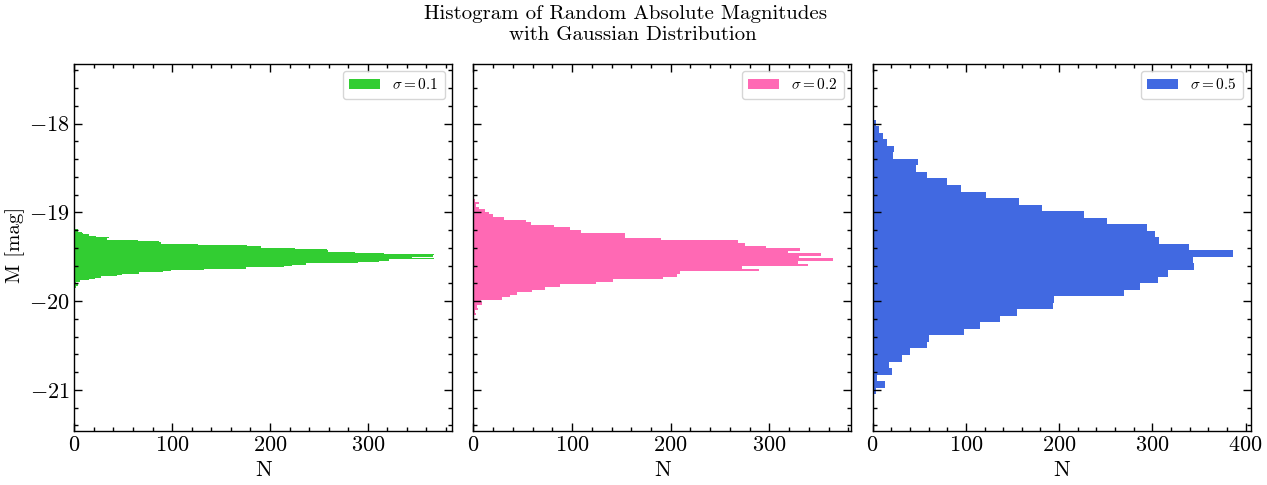

In [7]:
# Histrogram of the generated absolute magnitude distribution

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (13,5), sharey=True)
ax1, ax2, ax3 = axs.flatten()

fig.suptitle("Histogram of Random Absolute Magnitudes \n with Gaussian Distribution", fontsize = 15)
fig.supylabel("M [mag]", fontsize = 15)

bins1, n1, _ = ax1.hist(variables_arr[std_arr[0]], bins = "auto", orientation = "horizontal", color = "limeGreen", label = f"$\\sigma = {std_arr[0]}$")

ax1.set_xlabel("N")
ax1.legend(frameon = True, fontsize = 11.)

bins2, n2, _ = ax2.hist(variables_arr[std_arr[1]], bins = "auto", orientation = "horizontal", color = "hotpink", label = f"$\\sigma = {std_arr[1]}$")

ax2.set_xlabel("N")
ax2.legend(frameon = True, fontsize = 11.)

bins3, n3, _ = ax3.hist(variables_arr[std_arr[2]], bins = "auto", orientation = "horizontal",  color = "royalblue", label = f"$\\sigma = {std_arr[2]}$")

ax3.set_xlabel("N")
ax3.legend(frameon = True, fontsize = 11.)

plt.tight_layout()

plt.show()

(c) Write a python function to calculate and return:

- the luminosity distances, $d$, in $\rm Mpc$ given redshifts between $z=0$ and $z=0.1$.

- the apparent magnitudes, $m$, for the same redshift range.


- Distance:
\begin{equation}
d=\frac{cz}{H_0}
\end{equation}

, with $H_0 = 70\,\rm km\,s^{-1}\,Mpc^{-1}$. 

The speed of light should have units of [km/s]:

$$
c = 3\times 10^{8} \frac{m}{s} \equiv 3 \times 10^{5} \frac{km}{s}
$$

- Apparent magnitude:
\begin{equation}
m=M+5\log\left(\frac{d}{\rm Mpc}\right)+25
\end{equation}


In [8]:
def compute_magnitudes(z_arr, M):
    """
    Function to compute the luminosity distances and apparent magnitudes for a given set of redshifts.
    Inputs: 
        z_arr(float): 1D array containing redshift values for which the calculations are performed.
        M (floar): 1D array of the absolute magnitude of the object.
    Output: 
        d_arr (float): Array of luminosity distances [Mpc] corresponding to the redshifts in z_arr.
        m_dic (float): Dictionary where keys are redshift values and values are the 1D array with the calculated apparent magnitudes.
    Author: Alan Palma
    """

    # 1) Compute the distances within the defined red shift range

    H0 = 70. # Hubble constant [km/s*Mpc]
    c = 3.e5 # Light speed [km/s]

    d_arr = (c * z_arr)/H0

    # 2) Compute the apparent magnitudes

    # For loop to evaluate m in all distances d

    m_dic = {} # Empty dictionary to save all m arrays calculated

    for i in range(len(d_arr)):

        m_dic[z_arr[i]] = M + 5.*np.log10(d_arr[i]) + 25.

    return np.array(d_arr), m_dic


(d) Write a python function that:

- reads the resulting $m$ values from item (c),

- removes values with apparent magnitudes larger than the detection threshold $m=18.5\,\rm mag$, 

- re-calculates the mean observed magnitude $\langle M_{\rm observed}\rangle$ of the SN Ia from the actually detected objects for the same redshift range.

- returns the bias as a function of redshift. The bias in $M$ can be calculated with:

\begin{equation}
|\Delta M|=|\langle M_{\rm observed}\rangle  - \langle M\rangle|
\end{equation}

For re-calculating the mean observed magnitud is is used: 

$$
M=m-5\log\left(\frac{d}{\rm Mpc}\right)-25
$$

In [9]:
def compute_Mbias(m_dic, d_arr, z_arr, M_mean, m_th):
    """
    Function to compute the bias in absolute magnitude M by applying a threshold to apparent magnitudes m.
    Inputs: 
        m_dic(float): Dictionary where keys are redshift values z and values are arrays of apparent magnitudes m.
        d_arr(float): 1D array of luminosity distances [Mpc] corresponding to each redshift in z_arr.
        z_arr(float): 1D array of reshift values.
        M_mean(float): Mean absolute magnitude.
        m_th(float): Threshold for apparent magnitudes.
    Outputs: 
        m_clean(float): Dictionary where keys are redshift value z,
                        and values are 1D array filtered apparent magnitudes for each redshift.
        m_no_obs(float): Dictionary where keys are redshift value z,
                         and values are not observed apparent magnitudes for each redshift.
        delta_M_list(float): 1D Array of magnitude biases for each redshift.
    Author: Alan Palma
    """

    #For loop to iterate for all m values related with each shift value

    m_clean = {} #Empty dictionary to save m cleaned   
    m_no_obs = {} #Empty dictionary to save no observed m values 
    delta_M_list = [] #Empty list to save bias 

    for i in range(len(d_arr)):

        # 1) Remove values from m

        m_clean[z_arr[i]] = np.where(m_dic[z_arr[i]] > m_th, 0., m_dic[z_arr[i]])

        # Save also m values of no observed (For plotting)

        m_no_obs[z_arr[i]] = np.where(m_dic[z_arr[i]] < m_th, 0., m_dic[z_arr[i]])

        # 2) Recalculate the observed magnitude and get the mean

        M_obs = m_clean[z_arr[i]] - 5.*np.log10(d_arr[i]) - 25.

        M_mean_obs = np.mean(M_obs)

        # 3) Computhe the bias

        delta_M = np.abs(M_mean_obs - M_mean)

        delta_M_list.append(delta_M) #Append to the list

    delta_M_list = np.array(delta_M_list)

    return m_clean, m_no_obs, delta_M_list    



(e) Make $3$ plots of $m$ versus $N$, where $N$ is the number of generated objects, one for each $\sigma_M=0.1$, $0.2$, and $0.5\,\rm mag$, showing the detection threshold and colouring distinctly the objects that would not be detected.

In [25]:
# Call the function created in c)

# Define red shift limits

z_min = 1.e-20
z_max = 0.1
n_z = 100  # Number of points to create the z redshift array

# Generate the red shift array z

z = np.linspace(z_min, z_max, n_z)

# Compute m for all M with different standar diviations

d_std1, m_dic_std1 = compute_magnitudes(z, variables_arr[std_arr[0]]) # sigma = 0.1
d_std2, m_dic_std2 = compute_magnitudes(z, variables_arr[std_arr[1]]) # sigma = 0.2
d_std3, m_dic_std3 = compute_magnitudes(z, variables_arr[std_arr[2]]) # sigma = 0.5

# print(type(m_dic_std1))

In [26]:
# Call the function created in d)

# Define the threshold value

m_th = 18.5

# Compute for all m with different standar diviations

m_clean_std1, m_No_obs_std1, Mbias_std1 = compute_Mbias(m_dic_std1, d_std1, z,  M_mean, m_th) # sigma = 0.1
m_clean_std2, m_No_obs_std2, Mbias_std2 = compute_Mbias(m_dic_std2, d_std2, z,  M_mean, m_th) # sigma = 0.2
m_clean_std3, m_No_obs_std3, Mbias_std3 = compute_Mbias(m_dic_std3, d_std3, z,  M_mean, m_th) # sigma = 0.5

In [27]:
# Create an subarray of z values for plotting

z_sub = np.array([z_min, z[len(z)//4], z[len(z)//2], 3*z[len(z)//4], z_max])

# print(len(z)//2)

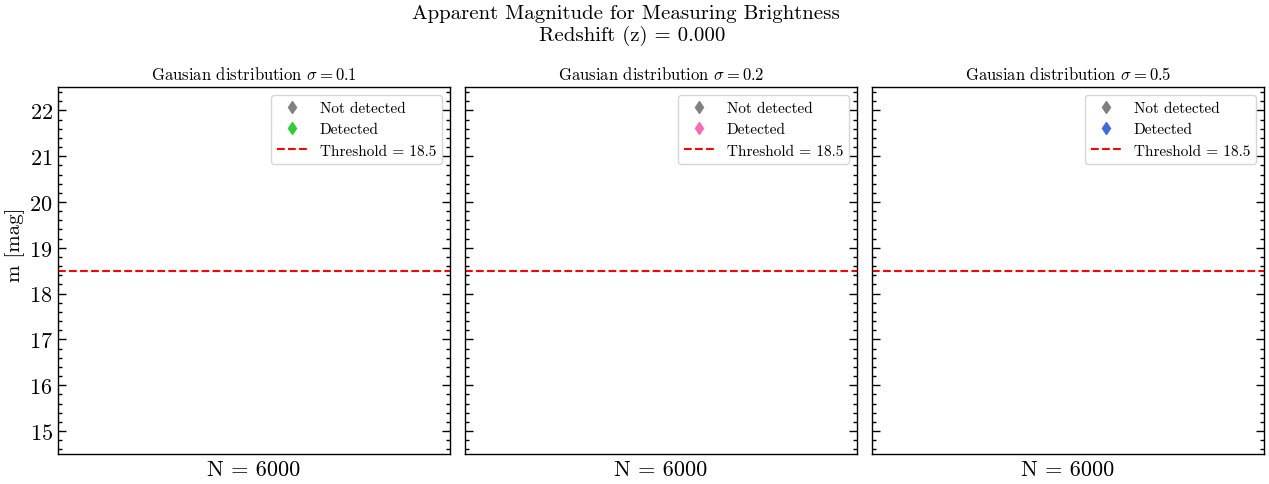

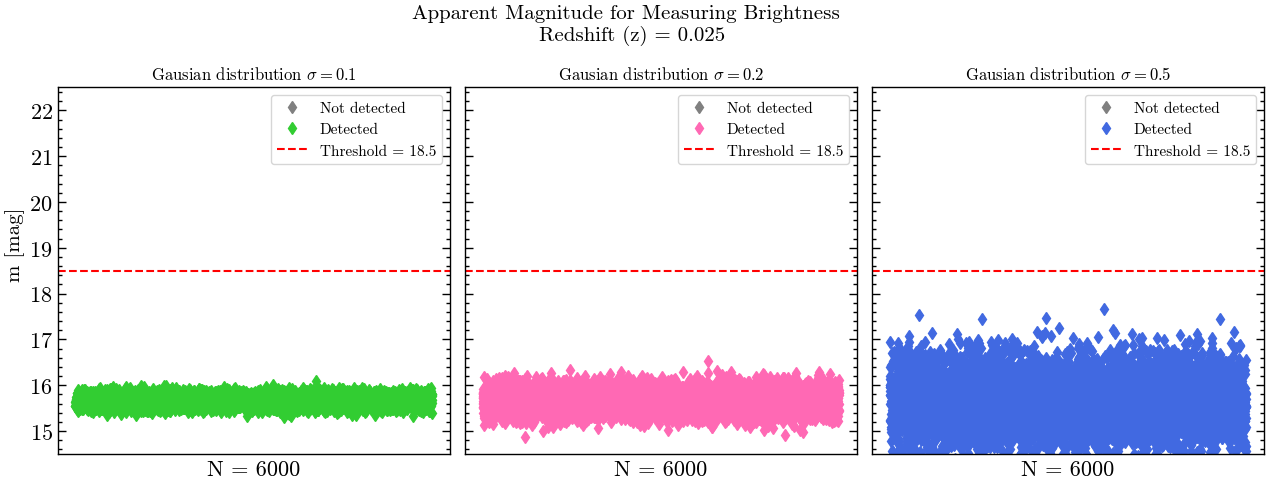

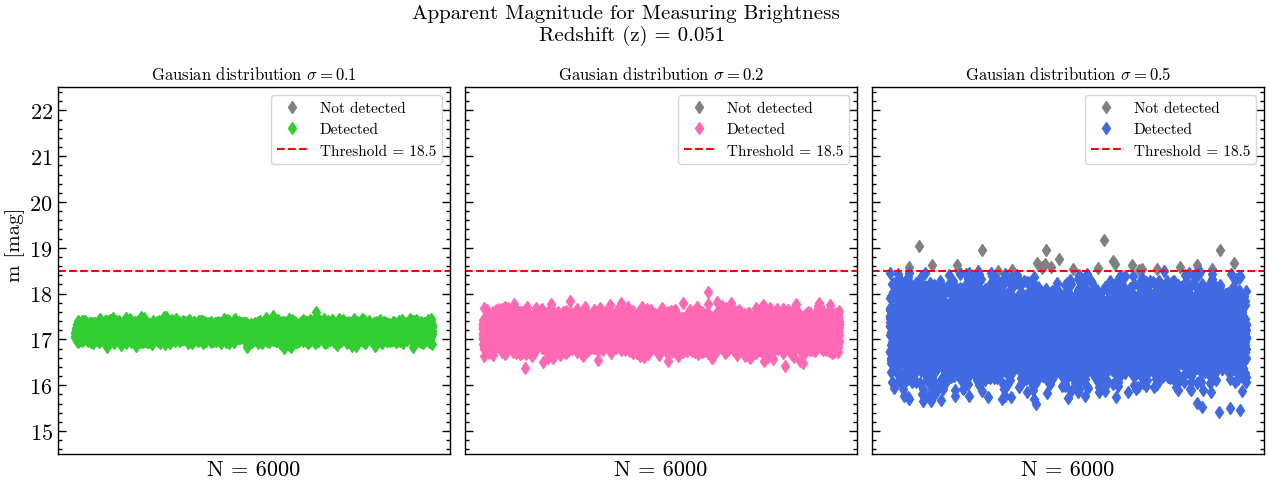

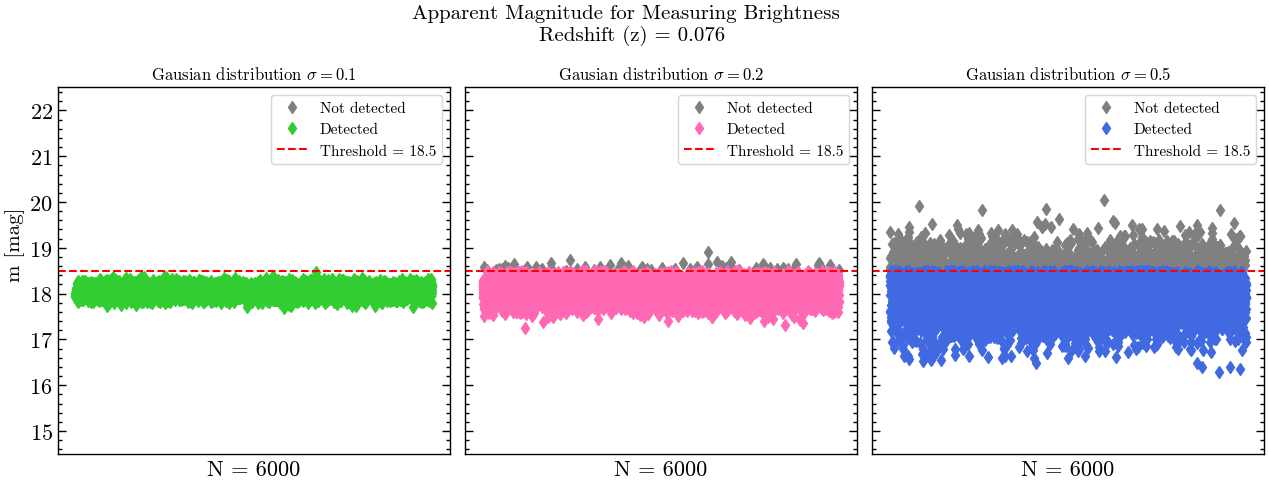

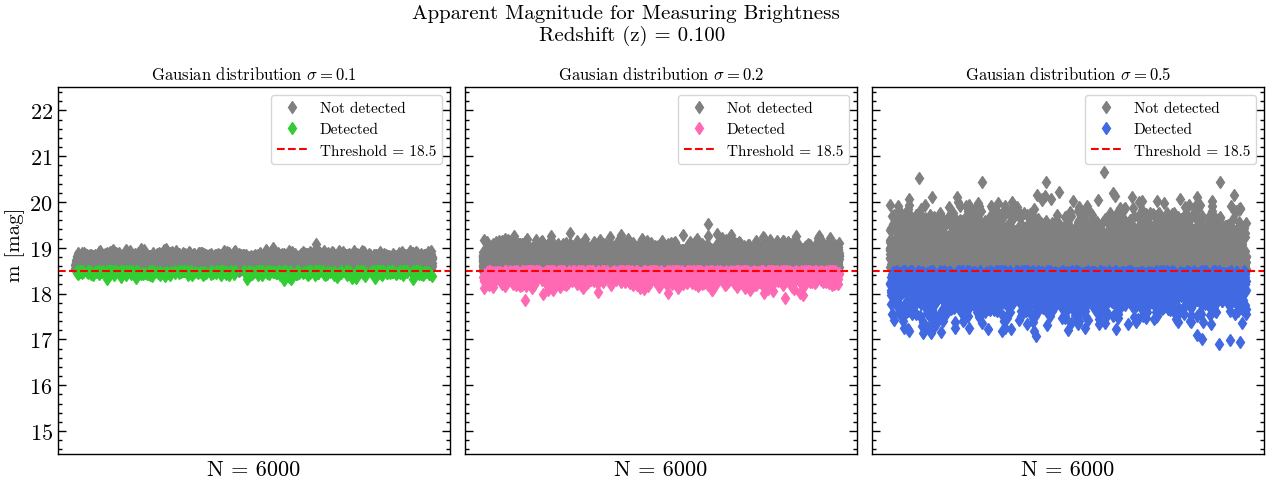

In [28]:
# Figure of  m apparent magnitud for all distributions

#For loop to generate images for some z values in z_sub array

for z_i in z_sub:

    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (13,5), sharey = True)
    ax1, ax2, ax3 = axs.flatten()

    fig.suptitle(f"Apparent Magnitude for Measuring Brightness \n Redshift (z) = {'%.3f' % z_i}", fontsize = 15, weight='bold')
    fig.supylabel("m [mag]", fontsize = 15)

    ax1.plot(N_arr, m_No_obs_std1[z_i], color = "gray", linestyle = " ", marker = "d", label = f"Not detected")
    ax1.plot(N_arr, m_clean_std1[z_i], color = "limeGreen", linestyle = " ", marker = "d", label = f"Detected")
    ax1.axhline(y=18.5, color = 'red', linestyle = '--', linewidth = 1.5, label = "Threshold = 18.5")  
    ax1.set_title(f"Gausian distribution $\\sigma = {std_arr[0]}$", fontsize = 12)
    ax1.set_xlabel(f"N = {N}")
    ax1.set_xticks([]) 

    ax1.legend(frameon = True, fontsize = 11.)

    ax2.plot(N_arr, m_No_obs_std2[z_i], color = "gray", linestyle = " ", marker = "d", label = f"Not detected")
    ax2.plot(N_arr, m_clean_std2[z_i], color = "hotpink", linestyle = " ", marker = "d", label = f"Detected")
    ax2.axhline(y=18.5, color = 'red', linestyle = '--', linewidth = 1.5, label = "Threshold = 18.5") 
    ax2.set_title(f"Gausian distribution $\\sigma = {std_arr[1]}$", fontsize = 12)
    ax2.set_xlabel(f"N = {N}")
    ax2.set_xticks([]) 

    ax2.legend(frameon = True, fontsize = 11.)

    ax3.plot(N_arr, m_No_obs_std3[z_i], color = "gray", linestyle = " ", marker = "d", label = f"Not detected")
    ax3.plot(N_arr, m_clean_std3[z_i], color = "royalblue", linestyle = " ", marker = "d", label = f"Detected")
    ax3.axhline(y=18.5, color = 'red', linestyle = '--', linewidth = 1.5, label = "Threshold = 18.5") 
    ax3.set_title(f"Gausian distribution $\\sigma = {std_arr[2]}$", fontsize = 12)
    ax3.set_xlabel(f"N = {N}")
    ax3.set_xticks([]) 
    ax3.legend(frameon = True, fontsize = 11.)

    ax1.set_ylim(18.5 - 4., 18.5 + 4.)

    plt.tight_layout()

    plt.show()

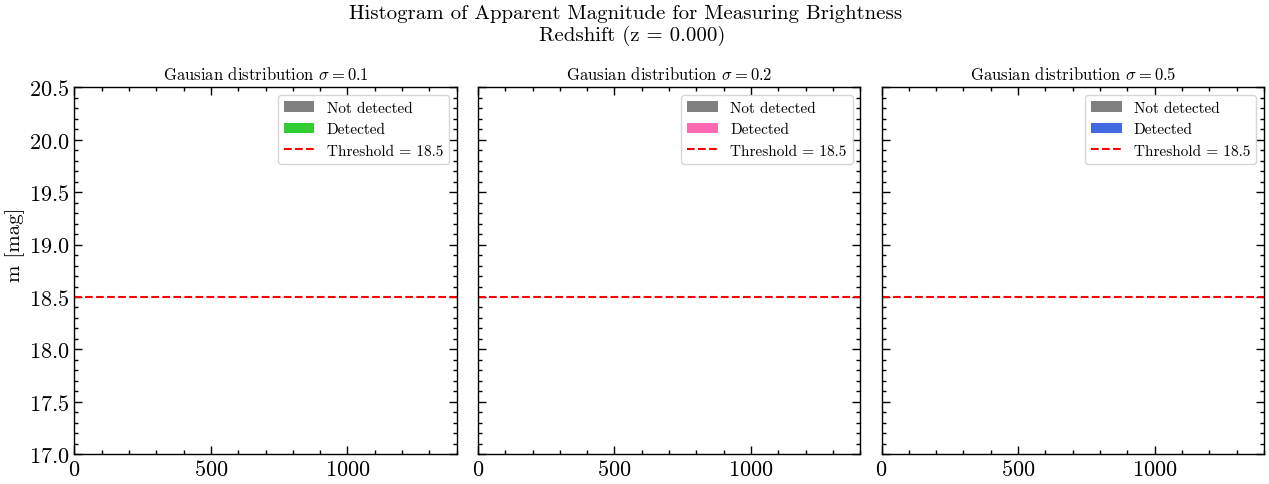

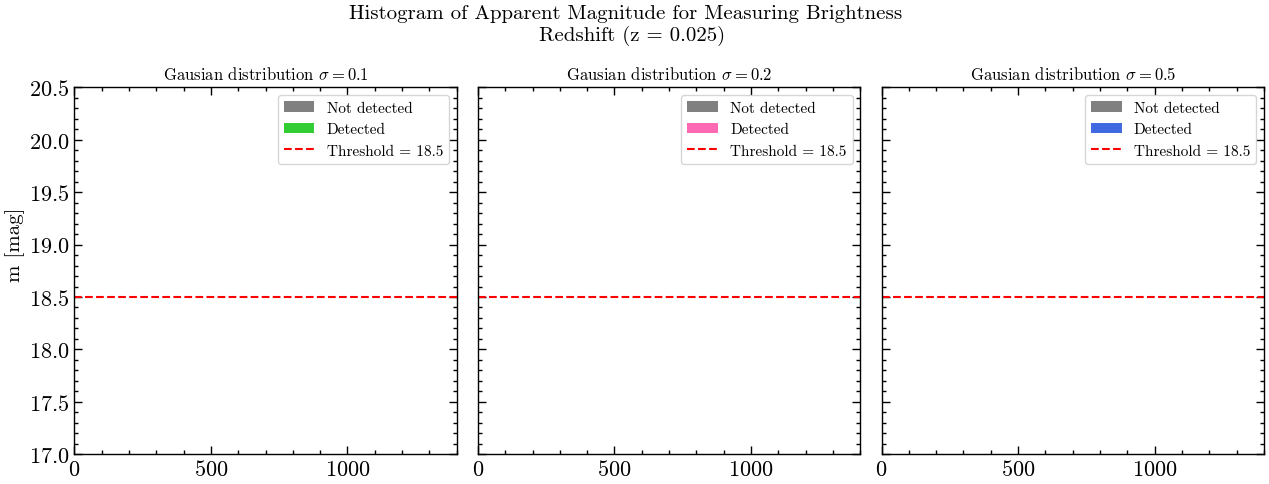

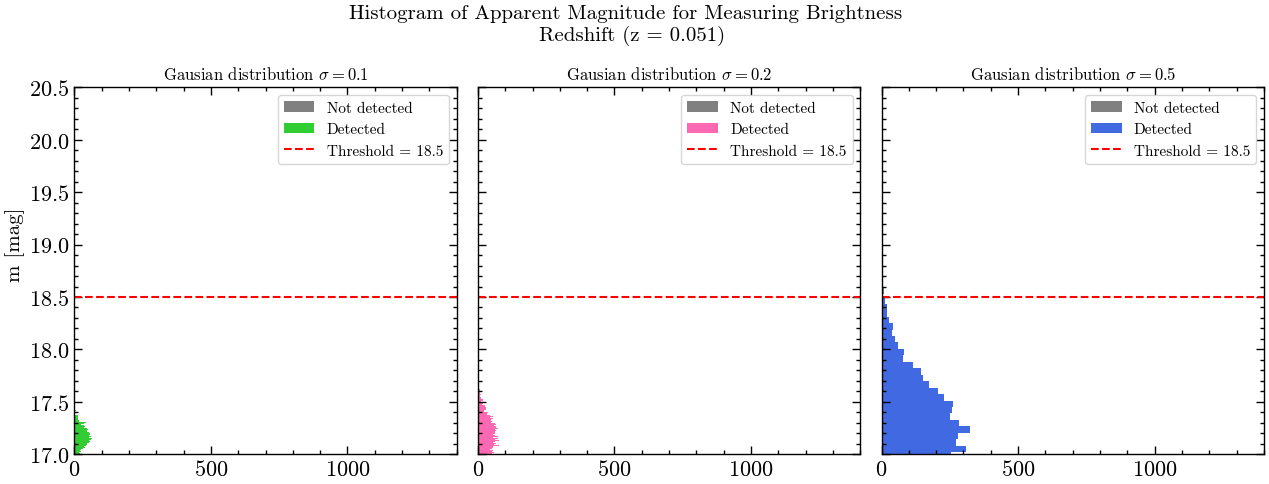

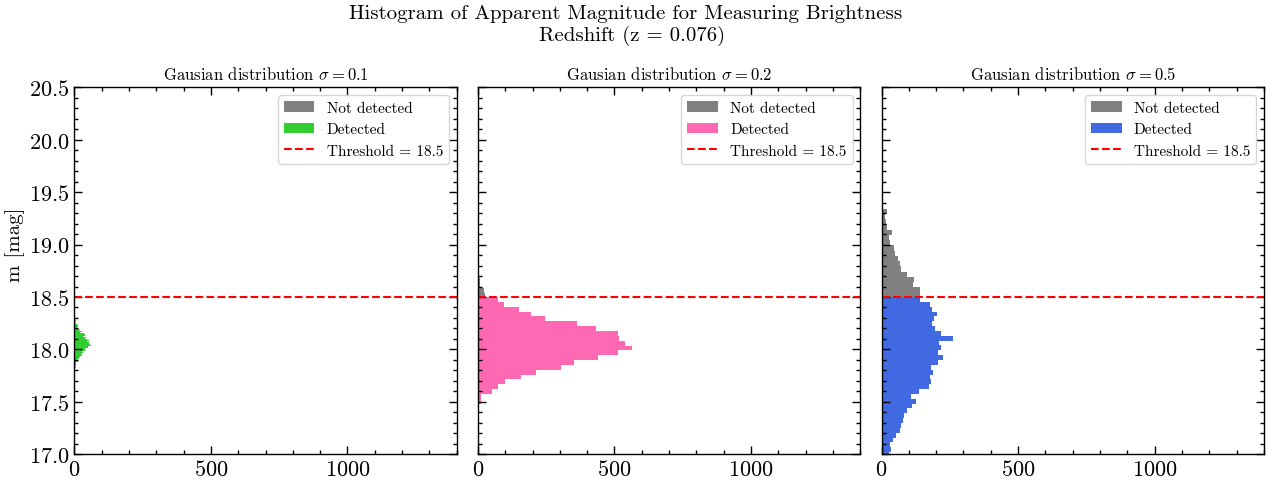

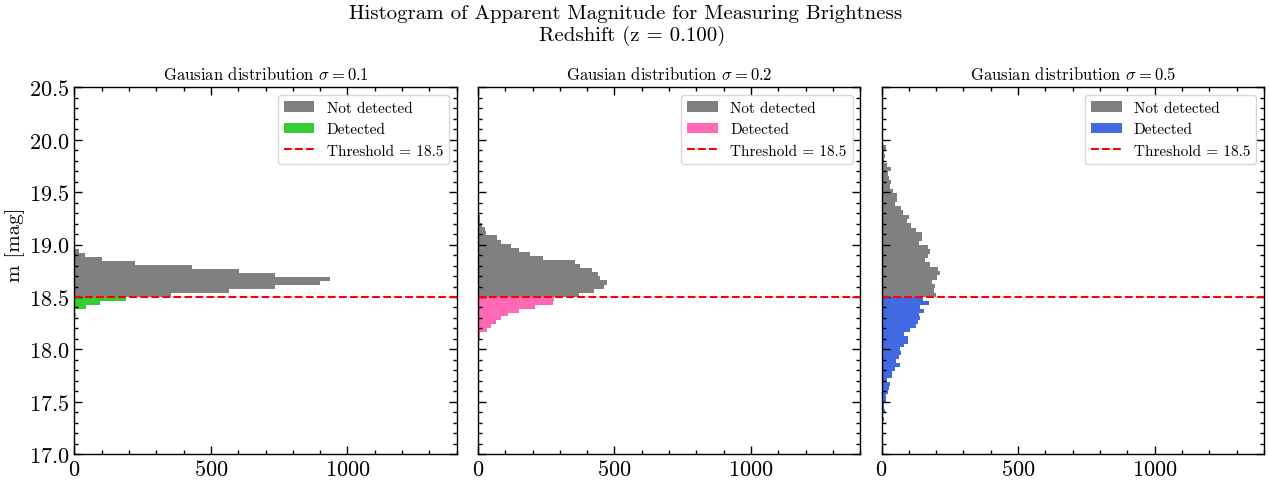

In [29]:
# Figure of the aparent magnitude distribution in a histogram

#For loop to generate images for some z values in z_sub array

# Initial number of bins

n_bin = 100

for z_i in z_sub:

    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (13,5), sharey = True, sharex = True)
    ax1, ax2, ax3 = axs.flatten()

    fig.suptitle(f"Histogram of Apparent Magnitude for Measuring Brightness \n Redshift (z = {'%.3f' % z_i})", fontsize = 15, weight='bold')
    fig.supylabel("m [mag]", fontsize = 15)

    bins1_1, n1_1, _ = ax1.hist(m_No_obs_std1[z_i], bins = n_bin, orientation = "horizontal", color = "gray", label = f"Not detected")
    bins1_2, n1_2, _ = ax1.hist(m_clean_std1[z_i], bins = n_bin, orientation = "horizontal", color = "limeGreen", label = f"Detected")
    ax1.axhline(y=18.5, color = 'red', linestyle = '--', linewidth = 1.5, label = "Threshold = 18.5")  
    ax1.set_title(f"Gausian distribution $\\sigma = {std_arr[0]}$", fontsize = 12)
    # ax1.set_xlabel("N")

    ax1.set_ylim(17, 20.5)
    ax1.set_xlim(0, 1400.)
    ax1.legend(frameon = True, fontsize = 11.)

    bins2_1, n2_1, _ = ax2.hist(m_No_obs_std2[z_i], bins = n_bin, orientation = "horizontal", color = "gray", label = f"Not detected")
    bins2_2, n2_2, _ = ax2.hist(m_clean_std2[z_i], bins = n_bin, orientation = "horizontal", color = "hotpink", label = f"Detected")
    ax2.axhline(y=18.5, color = 'red', linestyle = '--', linewidth = 1.5, label = "Threshold = 18.5")  
    ax2.set_title(f"Gausian distribution $\\sigma = {std_arr[1]}$", fontsize = 12)
    # ax1.set_xlabel("N")

    ax2.legend(frameon = True, fontsize = 11.)

    bins3_1, n3_1, _ = ax3.hist(m_No_obs_std3[z_i], bins = n_bin, orientation = "horizontal", color = "gray", label = f"Not detected")
    bins3_2, n3_2, _ = ax3.hist(m_clean_std3[z_i], bins = n_bin, orientation = "horizontal", color = "royalblue", label = f"Detected")
    ax3.axhline(y=18.5, color = 'red', linestyle = '--', linewidth = 1.5, label = "Threshold = 18.5")  
    ax3.set_title(f"Gausian distribution $\\sigma = {std_arr[2]}$", fontsize = 12)
    # ax1.set_xlabel("N")

    ax3.legend(frameon = True, fontsize = 11.)

    # Increase the number bins as z increases 

    n_bin += 100

    plt.tight_layout()

    plt.show()

(f) Make $3$ plots of $|\Delta M|$ versus $z$, one for each $\sigma_M=0.1$, $0.2$, and $0.5\,\rm mag$.

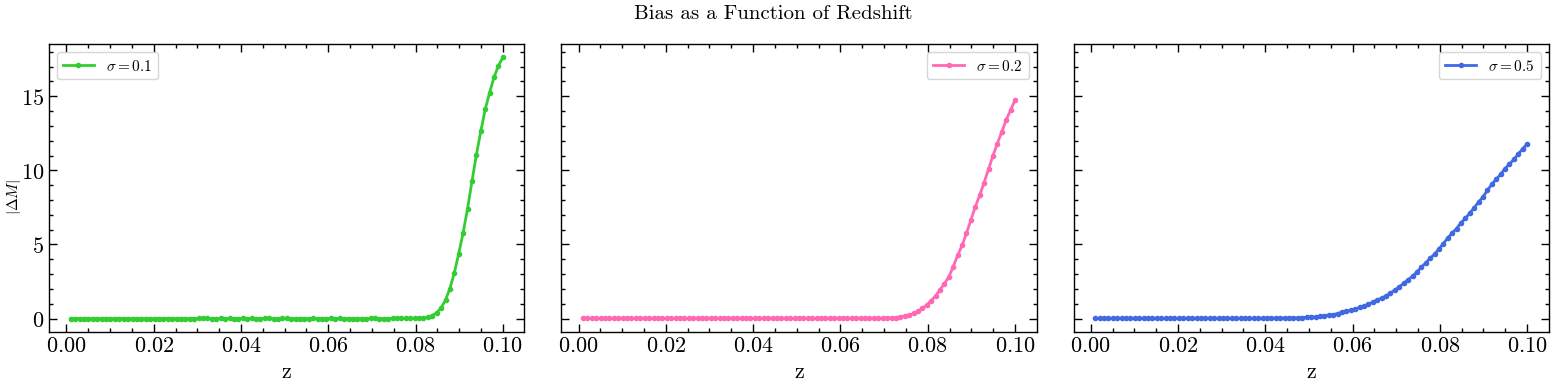

In [15]:
# Figure of the bias as function of reshift values in z

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4), sharey = True)
ax1, ax2, ax3 = axs.flatten()

fig.suptitle(f"Bias as a Function of Redshift", fontsize = 15, weight='bold')
fig.supylabel(f"$|\\Delta M|$", fontsize = 11)

ax1.plot(z, Mbias_std1, color = "limeGreen", linestyle = "-", marker = ".", label = f"$\\sigma = {std_arr[0]}$")
ax1.set_xlabel("z")

ax1.legend(frameon = True, fontsize = 11.)

ax2.plot(z, Mbias_std2, color = "hotpink", linestyle = "-", marker = ".", label = f"$\\sigma = {std_arr[1]}$")
ax2.set_xlabel("z")

ax2.legend(frameon = True, fontsize = 11.)

ax3.plot(z, Mbias_std3, color = "royalblue", linestyle = "-", marker = ".", label = f"$\\sigma = {std_arr[2]}$")
ax3.set_xlabel("z")

ax3.legend(frameon = True, fontsize = 11.)

plt.tight_layout()

plt.show()

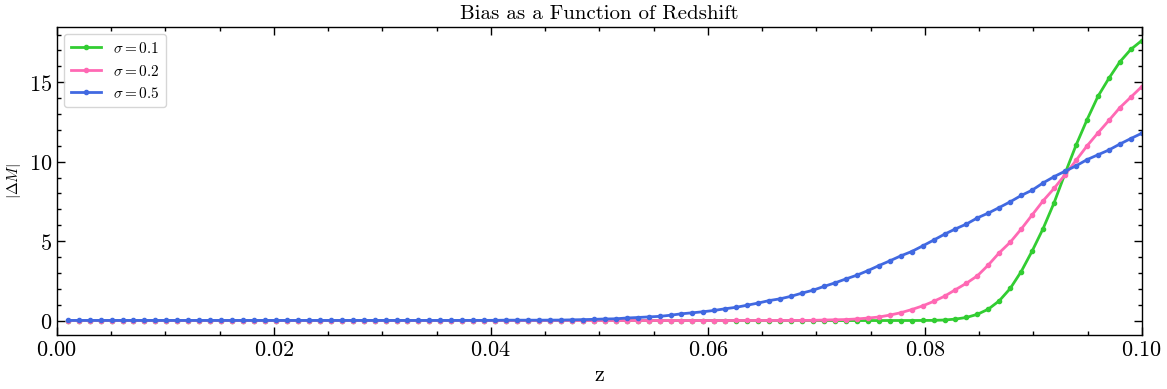

In [16]:
# Figure of the bias as function of reshift values in z (all together)

fig = plt.figure(figsize = (14,4))

plt.plot(z, Mbias_std1, color = "limeGreen", linestyle = "-", marker = ".", label = f"$\\sigma = {std_arr[0]}$")
plt.plot(z, Mbias_std2, color = "hotpink", linestyle = "-", marker = ".", label = f"$\\sigma = {std_arr[1]}$")
plt.plot(z, Mbias_std3, color = "royalblue", linestyle = "-", marker = ".", label = f"$\\sigma = {std_arr[2]}$")

plt.title(f"Bias as a Function of Redshift", fontsize = 15, weight='bold')
plt.xlabel("z")
plt.ylabel(f"$|\\Delta M|$", fontsize = 11)

plt.xlim(0, 0.1)
plt.legend(frameon = True, fontsize = 11.)

plt.show()

(g) Based on your results, at which redshift does selection bias become important in each case?

- Based on the results found above, it can be seen that the selection bias becomes important depending on the spread of the distribution. For the Gaussian distribution with $\sigma = 0.1$, the selection bias becomes important at a redshift value around $0.08$. In the case of the distribution with $\sigma = 0.2$, the selection bias becomes important at a shorter redshift, around $0.07$. Finally, in the more spread distribution with $\sigma = 0.5$, the selection bias is observed around $0.05$.

Now, the most accurate values for $z$ will be determined by deriving the array containing the bias and selecting the desired value using a threshold algorithm. The threshold value should be close to zero since the bias remains constant initially and then starts to increase. The chosen value for $z$ is the first number in the newly filtered bias array.

In [17]:
# Function to found values where the bias become important

def select_z_bias(M_bias, z_arr, th_dev):
    """
    Function to determine the point z where the bias becomes significant.
    Inputs: 
        M_bias(float): 1D array containing the bias values as a function of redshift.
        z_arrr(float): 1D array containing the redshift values
        th_dev(float): Threshold for the derivative to define significance in the bias.
    Output: 
        point(float): Tuple containing the redshift value z and the corresponding bias value 
                       where the bias becomes significant.
    Author: Alan Palma
    """
    # Compute the derivative

    h = z[1] - z[0] # Spacing of z array

    d_M_bias = np.gradient(M_bias, h, axis=0) # Derivative

    # Filter the values next to zero with a threshold value

    selected = np.where(d_M_bias > th_dev)

    # Get the index of the first slected value

    indx = selected[0][0]

    # Extract the point where the bias become important by indexing

    point  = (z_arr[indx], M_bias[indx])

    return point    


In [18]:
# Define the threshold to selected z in all bias arrays (should be next to zero)

th_z = 1.e-10

# Call the function for all bias arrays

point_std1 = select_z_bias(Mbias_std1, z, th_z) # sigma = 0.1
point_std2 = select_z_bias(Mbias_std2, z, th_z) # sigma = 0.2
point_std3 = select_z_bias(Mbias_std3, z, th_z) # sigma = 0.5

In [19]:
# Report the results

print(f"The redshift value z where the bias become important in the distribution with sigma=0.1 is {'%.3f' % point_std1[0]}")
print(f"The redshift value z where the bias become important in the distribution with sigma=0.2 is {'%.3f' % point_std2[0]}")
print(f"The redshift value z where the bias become important in the distribution with sigma=0.5 is {'%.3f' % point_std3[0]}")

The redshift value z where the bias become important in the distribution with sigma=0.1 is 0.076
The redshift value z where the bias become important in the distribution with sigma=0.2 is 0.062
The redshift value z where the bias become important in the distribution with sigma=0.5 is 0.036


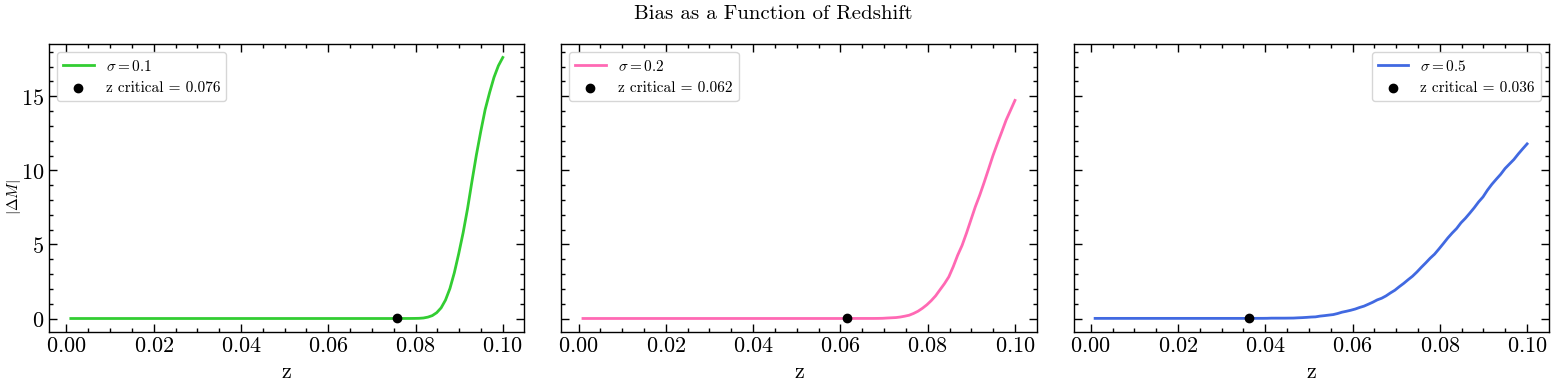

In [20]:
# Figure to show the selected points

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4), sharey = True)
ax1, ax2, ax3 = axs.flatten()

fig.suptitle(f"Bias as a Function of Redshift", fontsize = 15, weight='bold')
fig.supylabel(f"$|\\Delta M|$", fontsize = 11)

ax1.plot(z, Mbias_std1, color = "limeGreen", linestyle = "-", label = f"$\\sigma = {std_arr[0]}$")
ax1.scatter(point_std1[0], point_std1[1], marker = "o", color = "black", label = f"z critical = {'%.3f' % point_std1[0]}", zorder = 2)
ax1.set_xlabel("z")

ax1.legend(frameon = True, fontsize = 11.)

ax2.plot(z, Mbias_std2, color = "hotpink", linestyle = "-", label = f"$\\sigma = {std_arr[1]}$")
ax2.scatter(point_std2[0], point_std2[1], marker = "o", color = "black", label = f"z critical = {'%.3f' % point_std2[0]}", zorder = 2)
ax2.set_xlabel("z")

ax2.legend(frameon = True, fontsize = 11.)

ax3.plot(z, Mbias_std3, color = "royalblue", linestyle = "-", label = f"$\\sigma = {std_arr[2]}$")
ax3.scatter(point_std3[0], point_std3[1], marker = "o", color = "black", label = f"z critical = {'%.3f' % point_std3[0]}", zorder = 2)
ax3.set_xlabel("z")

ax3.legend(frameon = True, fontsize = 11.)

plt.tight_layout()

plt.show()

- Therefore, we know that at these values, the measured data deviates from our mean value (the true M value), which arises from detection limitations.

- In broader distributions, the tails of the distribution will be larger, leading to more extreme maxima values (brighter and fainter). Since our detectable threshold is $18.5 mag$, it does not matter if some SN la are brighter because our instrument will detect them anyway. However, there is a problem with fainter SNe, as we are losing information since they are not detectable. For this reason, the redshift at which the bias becomes important is shorter for the narrower distribution.